# 2025 COMP90042 Project
*Make sure you change the file name with your group id.*

# Readme
*If there is something to be noted for the marker, please mention here.*

*If you are planning to implement a program with Object Oriented Programming style, please put those the bottom of this ipynb file*

# 1.DataSet Processing
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

### a. Data loading and structure analysis

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Loading JSON data
sns.set(style="whitegrid")
with open('../../data/train-claims.json', 'r') as f:
    train_data = json.load(f)

with open('../../data/dev-claims.json', 'r') as f:
    dev_data = json.load(f)

with open('../../data/test-claims-unlabelled.json', 'r') as f:
    test_data = json.load(f)

with open('../../data/evidence.json', 'r') as f:
    evidence_data = json.load(f)

# Constructing a DataFrame with a uniform structure
def json_to_df(data_dict, data_type):
    records = []
    for claim_id, item in data_dict.items():
        record = {
            'id': claim_id,
            'claim_text': item.get('claim_text', ''),
            'claim_label': item.get('claim_label', None),
            'evidences': item.get('evidences', []),
            'data_type': data_type
        }
        records.append(record)
    return pd.DataFrame(records)

df_train = json_to_df(train_data, "train")
df_dev = json_to_df(dev_data, "dev")
df_test = json_to_df(test_data, "test")  # test has no labels and evidences

# Combining train and dev data for analysis
df_all = pd.concat([df_train, df_dev], ignore_index=True)

# Adding satistics to the DataFrame
df_all['text_len'] = df_all['claim_text'].str.split().apply(len)
df_all['num_evidence'] = df_all['evidences'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_all

,id,claim_text,claim_label,evidences,data_type,text_len,num_evidence
0,claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1...",train,24,3
1,claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]",train,17,2
2,claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]",train,8,2
3,claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5...",train,16,5
4,claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72...",train,19,5
...,...,...,...,...,...,...,...
1377,claim-2400,"'To suddenly label CO2 as a ""pollutant"" is a d...",REFUTES,"[evidence-409365, evidence-127519, evidence-85...",dev,31,4
1378,claim-204,"after a natural orbitally driven warming, atmo...",NOT_ENOUGH_INFO,"[evidence-368192, evidence-261690, evidence-20...",dev,14,5
1379,claim-1426,Many of the world’s coral reefs are already ba...,NOT_ENOUGH_INFO,"[evidence-1124018, evidence-995813, evidence-1...",dev,16,5
1380,claim-698,A recent study led by Lawrence Livermore Natio...,REFUTES,[evidence-660755],dev,40,1


In [2]:
df_test

,id,claim_text,claim_label,evidences,data_type
0,claim-2967,The contribution of waste heat to the global c...,None,[],test
1,claim-979,“Warm weather worsened the most recent five-ye...,None,[],test
2,claim-1609,Greenland has only lost a tiny fraction of its...,None,[],test
3,claim-1020,“The global reef crisis does not necessarily m...,None,[],test
4,claim-2599,Small amounts of very active substances can ca...,None,[],test
...,...,...,...,...,...
148,claim-293,When the measuring equipment gets old and need...,None,[],test
149,claim-910,"The cement, iron and steel, and petroleum refi...",None,[],test
150,claim-2815,A new peer-reviewed study on Surface Warming a...,None,[],test
151,claim-1652,The strong CO2 effect has been observed by man...,None,[],test


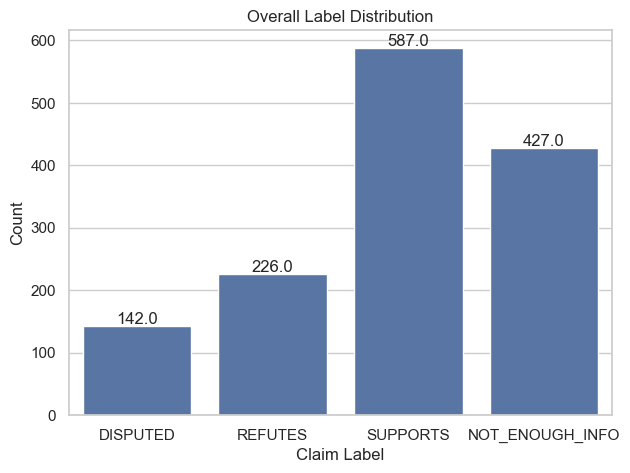

In [3]:
# 1. label distribution
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df_all, x='claim_label')
plt.title('Overall Label Distribution')
plt.xlabel('Claim Label')
plt.ylabel('Count')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

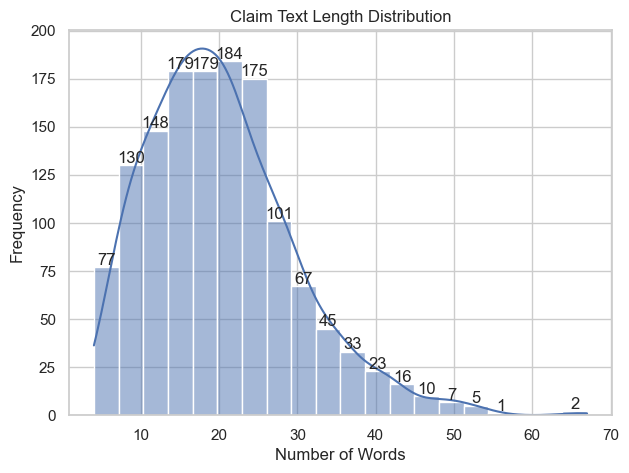

In [4]:
# 2. Claim text length distribution
plt.figure(figsize=(7, 5))
ax = sns.histplot(df_all['text_len'], bins=20, kde=True)
plt.title('Claim Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Annotate each bar with the count
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

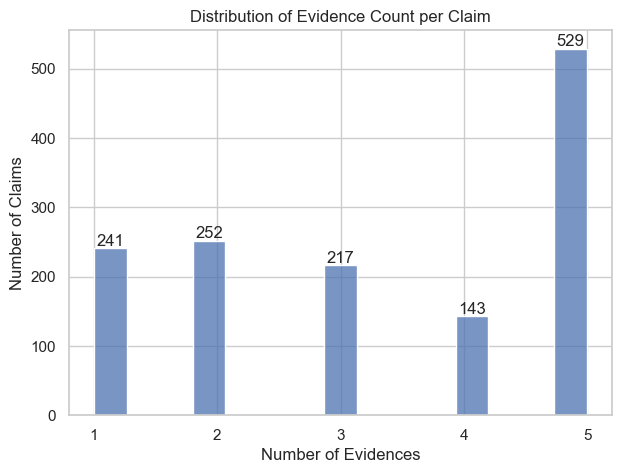

In [5]:
# 3. Evidence count distribution
plt.figure(figsize=(7, 5))
ax = sns.histplot(df_all['num_evidence'], bins=15, kde=False)
plt.title('Distribution of Evidence Count per Claim')
plt.xlabel('Number of Evidences')
plt.ylabel('Number of Claims')
plt.xticks(range(df_all['num_evidence'].min(), df_all['num_evidence'].max() + 1))  # Ensure integer ticks

# Annotate each bar with the count
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

### b. Text data pre-processing

In [6]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Get WordNet POS tag from NLTK POS tag
def get_wordnet_pos(nltk_pos_tag):
    if nltk_pos_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_pos_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Main preprocessing function
def preprocess_text(text):
    # 1. normalize text (lowercase, remove extra spaces)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()

    # 2. tokenization
    tokens = word_tokenize(text)

    # 3. filter out stop words and non-alphanumeric tokens
    def is_valid_token(t):
        return any(c.isalnum() for c in t)

    #tokens = [t for t in tokens if is_valid_token(t) and t not in stop_words]
    tokens = [t for t in tokens if is_valid_token(t)] # stop words may be useful

    # 4. Lemmatization
    pos_tags = nltk.pos_tag(tokens)
    lemmas = [lemmatizer.lemmatize(w, get_wordnet_pos(pos)) for w, pos in pos_tags]

    return lemmas

# Preprocess the claim text
df_all['claim_tokens'] = df_all['claim_text'].apply(preprocess_text)
df_all

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,id,claim_text,claim_label,evidences,data_type,text_len,num_evidence,claim_tokens
0,claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1...",train,24,3,"[not, only, be, there, no, scientific, evidenc..."
1,claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]",train,17,2,"[el, niño, drove, record, highs, in, global, t..."
2,claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]",train,8,2,"[in, 1946, pdo, switch, to, a, cool, phase]"
3,claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5...",train,16,5,"[weather, channel, co-founder, john, coleman, ..."
4,claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72...",train,19,5,"[january, 2008, cap, a, 12, month, period, of,..."
...,...,...,...,...,...,...,...,...
1377,claim-2400,"'To suddenly label CO2 as a ""pollutant"" is a d...",REFUTES,"[evidence-409365, evidence-127519, evidence-85...",dev,31,4,"['to, suddenly, label, co2, a, a, pollutant, b..."
1378,claim-204,"after a natural orbitally driven warming, atmo...",NOT_ENOUGH_INFO,"[evidence-368192, evidence-261690, evidence-20...",dev,14,5,"[after, a, natural, orbitally, driven, warm, a..."
1379,claim-1426,Many of the world’s coral reefs are already ba...,NOT_ENOUGH_INFO,"[evidence-1124018, evidence-995813, evidence-1...",dev,16,5,"[many, of, the, world, s, coral, reef, be, alr..."
1380,claim-698,A recent study led by Lawrence Livermore Natio...,REFUTES,[evidence-660755],dev,40,1,"[a, recent, study, lead, by, lawrence, livermo..."


In [7]:
# Print claim_text and claim_tokens for a single row in df_all
row_index = 0 # change for testing
print("Claim Text:", df_all.loc[row_index, 'claim_text'])
print("Claim Tokens:", df_all.loc[row_index, 'claim_tokens'])

Claim Text: Not only is there no scientific evidence that CO2 is a pollutant, higher CO2 concentrations actually help ecosystems support more plant and animal life.
Claim Tokens: ['not', 'only', 'be', 'there', 'no', 'scientific', 'evidence', 'that', 'co2', 'be', 'a', 'pollutant', 'high', 'co2', 'concentration', 'actually', 'help', 'ecosystems', 'support', 'more', 'plant', 'and', 'animal', 'life']


In [8]:
# Preprocess the evidence data(it will take about 10 minutes, just run it once)
from tqdm import tqdm

evidence_data_tokens = {
    evid_id: preprocess_text(text) for evid_id, text in tqdm(evidence_data.items())
}


100%|██████████| 1208827/1208827 [10:33<00:00, 1909.40it/s]


In [9]:
import os
import json

# Save the preprocessed evidence data tokens to a JSON file
os.makedirs('../../data', exist_ok=True)
save_path = '../../data/evidence_data_tokens.json'

with open(save_path, 'w', encoding='utf-8') as f:
    json.dump(evidence_data_tokens, f)

print(f"Saved preprocessed evidence tokens to: {save_path}")


Saved preprocessed evidence tokens to: ../../data/evidence_data_tokens.json


In [10]:
import json

# Load the preprocessed evidence data tokens from the JSON file
with open('../../data/evidence_data_tokens.json', 'r', encoding='utf-8') as f:
    evidence_data_tokens = json.load(f)

# Print the first evidence ID and its preprocessed tokens
first_id = list(evidence_data_tokens.keys())[0]
print(f"Evidence ID: {first_id}")
print("\nPreprocessed Tokens:")
print(evidence_data_tokens[first_id])
original_text = evidence_data[first_id]
print("Original Text:")
print(original_text)

Evidence ID: evidence-0

Preprocessed Tokens:
['john', 'bennet', 'lawes', 'english', 'entrepreneur', 'and', 'agricultural', 'scientist']
Original Text:
John Bennet Lawes, English entrepreneur and agricultural scientist


In [11]:
# Preprocess the claim text in train and dev data
df_train['claim_tokens'] = df_train['claim_text'].apply(preprocess_text)
df_dev['claim_tokens'] = df_dev['claim_text'].apply(preprocess_text)
df_train

,id,claim_text,claim_label,evidences,data_type,claim_tokens
0,claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1...",train,"[not, only, be, there, no, scientific, evidenc..."
1,claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]",train,"[el, niño, drove, record, highs, in, global, t..."
2,claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]",train,"[in, 1946, pdo, switch, to, a, cool, phase]"
3,claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5...",train,"[weather, channel, co-founder, john, coleman, ..."
4,claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72...",train,"[january, 2008, cap, a, 12, month, period, of,..."
...,...,...,...,...,...,...
1223,claim-1504,Climate scientists say that aspects of the cas...,SUPPORTS,"[evidence-1055682, evidence-1047356, evidence-...",train,"[climate, scientist, say, that, aspect, of, th..."
1224,claim-243,"In its 5th assessment report in 2013, the IPCC...",SUPPORTS,[evidence-916755],train,"[in, it, 5th, assessment, report, in, 2013, th..."
1225,claim-2302,"Since the mid 1970s, global temperatures have ...",NOT_ENOUGH_INFO,"[evidence-403673, evidence-889933, evidence-11...",train,"[since, the, mid, 1970s, global, temperature, ..."
1226,claim-502,But abnormal temperature spikes in February an...,NOT_ENOUGH_INFO,"[evidence-97375, evidence-562427, evidence-521...",train,"[but, abnormal, temperature, spike, in, februa..."


### c. “Digitizing” data to prepare for training models

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
import pandas as pd
from tqdm import tqdm

def construct_training_pairs_mixed_negatives(df_claims, evidence_token_dict,
                                             num_easy_neg=3, num_hard_neg=3, seed=42):
    """
    为每条 claim 构造：
    - 正样本（label=1）
    - 随机负样本（easy negatives，label=0）
    - TF-IDF 相似负样本（hard negatives，label=0）
    """
    random.seed(seed)
    pairs = []

    evid_id_list = list(evidence_token_dict.keys())
    evid_texts = [" ".join(evidence_token_dict[eid]) for eid in evid_id_list]

    # TF-IDF 建模并缓存 evidence 向量
    tfidf = TfidfVectorizer().fit(evid_texts)
    evid_vecs = tfidf.transform(evid_texts)

    for _, row in tqdm(df_claims.iterrows(), total=len(df_claims), desc="Building mixed pairs"):
        claim_id = row['id']
        claim_tokens = row['claim_tokens']
        claim_text = " ".join(claim_tokens)
        gold_ids = set(row['evidences'])

        # ✅ 添加正样本
        for evid_id in gold_ids:
            if evid_id in evidence_token_dict:
                pairs.append({
                    'claim_id': claim_id,
                    'claim_tokens': claim_tokens,
                    'evidence_id': evid_id,
                    'evidence_tokens': evidence_token_dict[evid_id],
                    'label': 1
                })

        # ✅ 添加随机负样本（easy negatives）
        candidate_neg = list(set(evid_id_list) - gold_ids)
        easy_neg_ids = random.sample(candidate_neg, min(num_easy_neg, len(candidate_neg)))
        for evid_id in easy_neg_ids:
            pairs.append({
                'claim_id': claim_id,
                'claim_tokens': claim_tokens,
                'evidence_id': evid_id,
                'evidence_tokens': evidence_token_dict[evid_id],
                'label': 0
            })

        # ✅ 添加 TF-IDF 相似负样本（hard negatives）
        claim_vec = tfidf.transform([claim_text])
        sims = cosine_similarity(claim_vec, evid_vecs).flatten()
        sorted_indices = sims.argsort()[::-1]

        hard_negatives = []
        for idx in sorted_indices:
            evid_id = evid_id_list[idx]
            if evid_id not in gold_ids and evid_id not in easy_neg_ids:
                hard_negatives.append(evid_id)
            if len(hard_negatives) >= num_hard_neg:
                break

        for evid_id in hard_negatives:
            pairs.append({
                'claim_id': claim_id,
                'claim_tokens': claim_tokens,
                'evidence_id': evid_id,
                'evidence_tokens': evidence_token_dict[evid_id],
                'label': 0
            })

    return pd.DataFrame(pairs)
# Construct training pairs with mixed negatives
train_pairs = construct_training_pairs_mixed_negatives(
    df_train, evidence_data_tokens,
    num_easy_neg=3, num_hard_neg=3
)


Building mixed pairs: 100%|██████████| 1228/1228 [11:58<00:00,  1.71it/s]


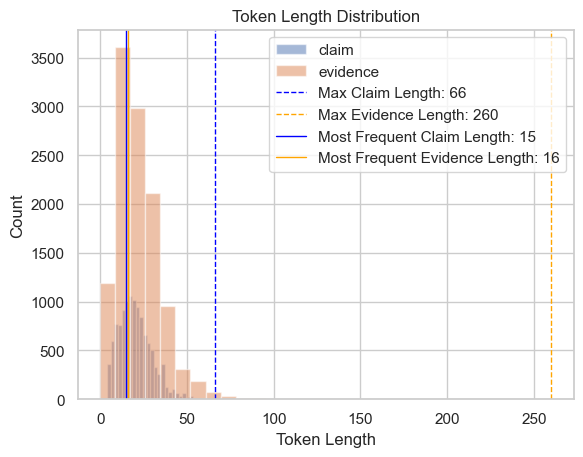

In [13]:
import matplotlib.pyplot as plt

#len of claim token 
train_pairs['claim_len'] = train_pairs['claim_tokens'].apply(len)

# len Evidence token
train_pairs['evidence_len'] = train_pairs['evidence_tokens'].apply(len)

# Merge Visualization
plt.hist(train_pairs['claim_len'], bins=30, alpha=0.5, label='claim')
plt.hist(train_pairs['evidence_len'], bins=30, alpha=0.5, label='evidence')

# Mark the highest value
max_claim_len = train_pairs['claim_len'].max()
max_evidence_len = train_pairs['evidence_len'].max()

plt.axvline(max_claim_len, color='blue', linestyle='dashed', linewidth=1, label=f'Max Claim Length: {max_claim_len}')
plt.axvline(max_evidence_len, color='orange', linestyle='dashed', linewidth=1, label=f'Max Evidence Length: {max_evidence_len}')

# Mark the value with the highest frequency
most_frequent_claim_len = train_pairs['claim_len'].value_counts().idxmax()
most_frequent_evidence_len = train_pairs['evidence_len'].value_counts().idxmax()

plt.axvline(most_frequent_claim_len, color='blue', linestyle='solid', linewidth=1, label=f'Most Frequent Claim Length: {most_frequent_claim_len}')
plt.axvline(most_frequent_evidence_len, color='orange', linestyle='solid', linewidth=1, label=f'Most Frequent Evidence Length: {most_frequent_evidence_len}')

plt.xlabel('Token Length')
plt.ylabel('Count')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

# Drop the length columns after visualization
train_pairs = train_pairs.drop(columns=['claim_len', 'evidence_len'])

In [14]:
from collections import Counter

# Step 1: Building a vocabulary
def build_vocab(train_df, min_freq=1):
    counter = Counter()

    for tokens in train_df['claim_tokens'].tolist() + train_df['evidence_tokens'].tolist():
        counter.update(tokens)

    vocab = {"<PAD>": 0, "<UNK>": 1}
    idx = 2
    for word, freq in counter.items():
        if freq >= min_freq:
            vocab[word] = idx
            idx += 1

    return vocab

# Step 2: tokens → index
def tokens_to_indices(tokens, vocab):
    return [vocab.get(t, vocab["<UNK>"]) for t in tokens]

# Step 3: padding
def pad_sequence(indices, max_len, pad_value=0):
    if len(indices) >= max_len:
        return indices[:max_len]
    else:
        return indices + [pad_value] * (max_len - len(indices))

# Step 4: Apply to train_pairs
MAX_LEN_CLAIM = 40
MAX_LEN_EVIDENCE = 80

# Build vocabulary with train_pairs
vocab = build_vocab(train_pairs)

# Perform token → index → ​​padding
train_pairs['claim_indices'] = train_pairs['claim_tokens'].apply(
    lambda x: pad_sequence(tokens_to_indices(x, vocab), MAX_LEN_CLAIM))

train_pairs['evidence_indices'] = train_pairs['evidence_tokens'].apply(
    lambda x: pad_sequence(tokens_to_indices(x, vocab), MAX_LEN_EVIDENCE))

train_pairs


,claim_id,claim_tokens,evidence_id,evidence_tokens,label,claim_indices,evidence_indices
0,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-1194317,"[plant, can, grow, as, much, a, 50, percent, f...",1,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[20, 430, 289, 683, 127, 11, 989, 367, 1977, 2..."
1,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-12171,"[high, carbon, dioxide, concentration, will, f...",1,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[13, 340, 341, 14, 328, 3428, 1032, 20, 2304, ..."
2,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-442946,"[at, very, high, concentration, 100, time, atm...",1,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[293, 560, 13, 14, 464, 71, 146, 14, 208, 405,..."
3,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-579843,"[duggan, play, collegiate, hockey, with, the, ...",0,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[3435, 2604, 3436, 1281, 100, 52, 3004, 3437, ..."
4,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-474332,"[subsequently, the, organization, continue, it...",0,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[2480, 52, 2292, 2072, 352, 377, 100, 52, 30, ..."
...,...,...,...,...,...,...,...
11485,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-537256,"[the, three, station, be, all, brand, a, kdfc,...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[52, 515, 672, 4, 65, 4518, 11, 19937, 21, 4, ..."
11486,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-684319,"[benedick, bat, born, 1971, be, a, british, ac...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[19938, 2937, 3729, 6339, 4, 11, 4528, 5707, 0..."
11487,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-537318,"[this, include, the, whole, range, of, electro...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[213, 698, 52, 1682, 2327, 54, 3420, 1560, 325..."
11488,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-710688,"[the, propose, method, involve, create, a, lar...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[52, 1615, 1520, 1824, 217, 11, 236, 18671, 54..."


In [15]:
# Save train_pairs as JSON, one sample per line
train_pairs.to_json("../../data/train_pairs.json", orient="records", lines=True, force_ascii=False)

print("train_pairs has been successfully saved as a JSON file：../../data/train_pairs.json")

# Loading the JSON file
train_pairs = pd.read_json("../../data/train_pairs.json", orient="records", lines=True)
train_pairs


train_pairs has been successfully saved as a JSON file：../../data/train_pairs.json


,claim_id,claim_tokens,evidence_id,evidence_tokens,label,claim_indices,evidence_indices
0,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-1194317,"[plant, can, grow, as, much, a, 50, percent, f...",1,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[20, 430, 289, 683, 127, 11, 989, 367, 1977, 2..."
1,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-12171,"[high, carbon, dioxide, concentration, will, f...",1,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[13, 340, 341, 14, 328, 3428, 1032, 20, 2304, ..."
2,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-442946,"[at, very, high, concentration, 100, time, atm...",1,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[293, 560, 13, 14, 464, 71, 146, 14, 208, 405,..."
3,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-579843,"[duggan, play, collegiate, hockey, with, the, ...",0,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[3435, 2604, 3436, 1281, 100, 52, 3004, 3437, ..."
4,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-474332,"[subsequently, the, organization, continue, it...",0,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[2480, 52, 2292, 2072, 352, 377, 100, 52, 30, ..."
...,...,...,...,...,...,...,...
11485,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-537256,"[the, three, station, be, all, brand, a, kdfc,...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[52, 515, 672, 4, 65, 4518, 11, 19937, 21, 4, ..."
11486,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-684319,"[benedick, bat, born, 1971, be, a, british, ac...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[19938, 2937, 3729, 6339, 4, 11, 4528, 5707, 0..."
11487,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-537318,"[this, include, the, whole, range, of, electro...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[213, 698, 52, 1682, 2327, 54, 3420, 1560, 325..."
11488,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-710688,"[the, propose, method, involve, create, a, lar...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[52, 1615, 1520, 1824, 217, 11, 236, 18671, 54..."


# 2. Model Implementation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

### a. Convert training samples (claim + evidence + label) into a format that PyTorch can read in batches and feed into model training

In [16]:
# Loading the JSON file to start
import pandas as pd
train_pairs = pd.read_json("../../data/train_pairs.json", orient="records", lines=True)
train_pairs

,claim_id,claim_tokens,evidence_id,evidence_tokens,label,claim_indices,evidence_indices
0,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-1194317,"[plant, can, grow, as, much, a, 50, percent, f...",1,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[20, 430, 289, 683, 127, 11, 989, 367, 1977, 2..."
1,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-12171,"[high, carbon, dioxide, concentration, will, f...",1,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[13, 340, 341, 14, 328, 3428, 1032, 20, 2304, ..."
2,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-442946,"[at, very, high, concentration, 100, time, atm...",1,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[293, 560, 13, 14, 464, 71, 146, 14, 208, 405,..."
3,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-579843,"[duggan, play, collegiate, hockey, with, the, ...",0,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[3435, 2604, 3436, 1281, 100, 52, 3004, 3437, ..."
4,claim-1937,"[not, only, be, there, no, scientific, evidenc...",evidence-474332,"[subsequently, the, organization, continue, it...",0,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 10...","[2480, 52, 2292, 2072, 352, 377, 100, 52, 30, ..."
...,...,...,...,...,...,...,...
11485,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-537256,"[the, three, station, be, all, brand, a, kdfc,...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[52, 515, 672, 4, 65, 4518, 11, 19937, 21, 4, ..."
11486,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-684319,"[benedick, bat, born, 1971, be, a, british, ac...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[19938, 2937, 3729, 6339, 4, 11, 4528, 5707, 0..."
11487,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-537318,"[this, include, the, whole, range, of, electro...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[213, 698, 52, 1682, 2327, 54, 3420, 1560, 325..."
11488,claim-3093,"[send, oscillate, microwave, from, an, antenna...",evidence-710688,"[the, propose, method, involve, create, a, lar...",0,"[1785, 2223, 3416, 325, 117, 3417, 3418, 11, 3...","[52, 1615, 1520, 1824, 217, 11, 236, 18671, 54..."


In [17]:
import torch
from torch.utils.data import Dataset

class RetrievalDataset(Dataset):
    def __init__(self, df):
        """
        输入的 df 是包含 claim_indices, evidence_indices 和 label 的 DataFrame。
        """
        self.claims = df['claim_indices'].tolist()
        self.evidences = df['evidence_indices'].tolist()
        self.labels = df['label'].tolist()

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "claim": torch.tensor(self.claims[idx], dtype=torch.long),
            "evidence": torch.tensor(self.evidences[idx], dtype=torch.long),
            "label": torch.tensor(self.labels[idx], dtype=torch.float),
        }


In [18]:
from torch.utils.data import DataLoader

# 实例化数据集
train_dataset = RetrievalDataset(train_pairs)

# 创建数据加载器（你可以调整 batch_size）
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 示例：取一个 batch
batch = next(iter(train_loader))
print(batch['claim'].shape)
print(batch['evidence'].shape)
print(batch['label'].shape)


torch.Size([32, 40])
torch.Size([32, 80])
torch.Size([32])


### b. Defining the LSTM Model

In [19]:
# 1. 模型结构：LSTM-based Matching Model
import torch
import torch.nn as nn
import torch.nn.functional as F

class LSTMRetrievalModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 8, 1)


    def encode(self, x):
        emb = self.embedding(x)                     # [batch, seq_len, emb_dim]
        output, _ = self.lstm(emb)                  # [batch, seq_len, 2*hidden]
        pooled = torch.mean(output, dim=1)          # 平均池化 → [batch, 2*hidden]
        return pooled

    def forward(self, claim, evidence):
        c = self.encode(claim)                      # [batch, 2*hidden]
        e = self.encode(evidence)                   # [batch, 2*hidden]
        combined = torch.cat([c, e, torch.abs(c - e), c * e], dim=1)  # [batch, 4*hidden]
        out = self.fc(combined).squeeze(1)          # [batch]
        return torch.sigmoid(out)                   # [batch], 输出为概率



In [20]:
# 2. 初始化模型
vocab_size = len(vocab)
model = LSTMRetrievalModel(vocab_size=vocab_size, embedding_dim=100, hidden_dim=128)


In [21]:
# 3. 设置训练组件 + 训练循环（含进度条）
from torch.optim import Adam
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=1e-3)

def train_one_epoch(model, dataloader, optimizer, criterion):
    model.train()
    running_loss = 0.0

    for batch in tqdm(dataloader, desc="Training"):
        claim = batch['claim'].to(device)
        evidence = batch['evidence'].to(device)
        label = batch['label'].to(device)

        pred = model(claim, evidence)
        loss = criterion(pred, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(dataloader)


In [22]:
EPOCHS = 10

for epoch in range(1, EPOCHS + 1):
    loss = train_one_epoch(model, train_loader, optimizer, criterion)
    print(f"* Epoch {epoch}/{EPOCHS} — Avg Loss: {loss:.4f}")


Training: 100%|██████████| 360/360 [00:01<00:00, 190.67it/s]


* Epoch 1/10 — Avg Loss: 0.5548


Training: 100%|██████████| 360/360 [00:01<00:00, 241.17it/s]


* Epoch 2/10 — Avg Loss: 0.4487


Training: 100%|██████████| 360/360 [00:01<00:00, 236.82it/s]


* Epoch 3/10 — Avg Loss: 0.3763


Training: 100%|██████████| 360/360 [00:01<00:00, 230.63it/s]


* Epoch 4/10 — Avg Loss: 0.3131


Training: 100%|██████████| 360/360 [00:01<00:00, 240.19it/s]


* Epoch 5/10 — Avg Loss: 0.2575


Training: 100%|██████████| 360/360 [00:01<00:00, 240.51it/s]


* Epoch 6/10 — Avg Loss: 0.2089


Training: 100%|██████████| 360/360 [00:01<00:00, 240.41it/s]


* Epoch 7/10 — Avg Loss: 0.1683


Training: 100%|██████████| 360/360 [00:01<00:00, 238.56it/s]


* Epoch 8/10 — Avg Loss: 0.1382


Training: 100%|██████████| 360/360 [00:01<00:00, 240.46it/s]


* Epoch 9/10 — Avg Loss: 0.1160


Training: 100%|██████████| 360/360 [00:01<00:00, 240.94it/s]

* Epoch 10/10 — Avg Loss: 0.0997


# 3.Testing and Evaluation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

In [34]:
import json
import pandas as pd
import torch
from tqdm import tqdm

def predict_and_export_from_json(json_path, model, vocab, evidence_dict,
                                 top_k=5, max_len_claim=40, max_len_evidence=80,
                                 save_path="predictions.json", batch_size=1024):
    """
    与训练结构一致的高效推理函数：逐批送入 GPU，避免提前占满显存。
    """

    device = next(model.parameters()).device
    model.eval()

    # Step 1: 加载 claim 数据并预处理
    with open(json_path, 'r') as f:
        raw_data = json.load(f)
    df = json_to_df(raw_data, data_type="unknown")
    df['claim_tokens'] = df['claim_text'].apply(preprocess_text)

    # Step 2: 准备 evidence token 列表（不送入 GPU）
    evid_ids = list(evidence_dict.keys())
    evid_token_lists = [evidence_dict[eid] for eid in evid_ids]
    evid_tensor_list = [
        pad_sequence(tokens_to_indices(tokens, vocab), max_len_evidence)
        for tokens in evid_token_lists
    ]
    # 注意：不再提前送入 GPU，保持在 CPU，按需加载

    output_dict = {}

    # Step 3: 对每条 claim 进行批量匹配评分
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Predicting"):
        claim_id = row['id']
        claim_tokens = row['claim_tokens']

        # 构造 claim tensor
        claim_idx = pad_sequence(tokens_to_indices(claim_tokens, vocab), max_len_claim)
        claim_tensor = torch.tensor(claim_idx, dtype=torch.long).unsqueeze(0).to(device)

        scores = []

        with torch.no_grad():
            for i in range(0, len(evid_tensor_list), batch_size):
                batch_evid = torch.tensor(
                    evid_tensor_list[i:i + batch_size], dtype=torch.long
                ).to(device)

                batch_claim = claim_tensor.expand(batch_evid.size(0), -1)  # [B, max_len_claim]

                batch_scores = model(batch_claim, batch_evid)  # [B]
                scores.extend(batch_scores.cpu().tolist())

        # 选 top-k evidence
        scored = list(zip(evid_ids, scores))
        scored.sort(key=lambda x: x[1], reverse=True)
        topk_evid = [eid for eid, _ in scored[:top_k]]

        output_dict[claim_id] = {
            "claim_label": row.get("claim_label", "SUPPORTS"),  # 若无标签默认填入
            "evidences": topk_evid
        }

    # Step 4: 保存为 JSON 文件
    with open(save_path, 'w') as f:
        json.dump(output_dict, f, indent=2)

    print(f"Prediction results saved to: {save_path}")



In [35]:
predict_and_export_from_json(
    json_path="../../data/dev-claims.json",
    model=model,
    vocab=vocab,
    evidence_dict=evidence_data_tokens,
    top_k=6,
    batch_size=2048,
    save_path="../../data/dev-claims-predictions.json"
)



Predicting: 100%|██████████| 154/154 [1:31:12<00:00, 35.54s/it]


Prediction results saved to: ../../data/dev-claims-predictions.json


In [36]:
with open('../../data/dev-claims-predictions.json', 'r') as f:
    result_data = json.load(f)
result_data

{'claim-752': {'claim_label': 'SUPPORTS',
  'evidences': ['evidence-73528',
   'evidence-279780',
   'evidence-433622',
   'evidence-877084',
   'evidence-604567',
   'evidence-161406']},
 'claim-375': {'claim_label': 'NOT_ENOUGH_INFO',
  'evidences': ['evidence-28365',
   'evidence-55562',
   'evidence-73528',
   'evidence-155833',
   'evidence-309007',
   'evidence-355707']},
 'claim-1266': {'claim_label': 'SUPPORTS',
  'evidences': ['evidence-73528',
   'evidence-877084',
   'evidence-433622',
   'evidence-355707',
   'evidence-279780',
   'evidence-161406']},
 'claim-871': {'claim_label': 'NOT_ENOUGH_INFO',
  'evidences': ['evidence-73528',
   'evidence-433622',
   'evidence-877084',
   'evidence-355707',
   'evidence-738531',
   'evidence-161406']},
 'claim-2164': {'claim_label': 'REFUTES',
  'evidences': ['evidence-73528',
   'evidence-877084',
   'evidence-433622',
   'evidence-355707',
   'evidence-279780',
   'evidence-161406']},
 'claim-1607': {'claim_label': 'NOT_ENOUGH_INFO

In [37]:
!python ../../eval.py \
  --predictions ../../data/dev-claims-predictions.json \
  --groundtruth ../../data/dev-claims.json


Evidence Retrieval F-score (F)    = 0.0
Claim Classification Accuracy (A) = 1.0
Harmonic Mean of F and A          = 0.0


In [39]:
import json

with open("../../data/dev-claims-predictions.json", 'r') as f:
    preds = json.load(f)

with open("../../data/dev-claims.json", 'r') as f:
    truth = json.load(f)

for cid in preds:
    print("🟢 CLAIM:", truth[cid]["claim_text"])
    print("True evidence:", truth[cid]["evidences"])
    print("Predicted:", preds[cid]["evidences"])
    break


🟢 CLAIM: [South Australia] has the most expensive electricity in the world.
True evidence: ['evidence-67732', 'evidence-572512']
Predicted: ['evidence-73528', 'evidence-279780', 'evidence-433622', 'evidence-877084', 'evidence-604567', 'evidence-161406']


## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed*